
## ***Practical Machine Learning***
## ***CDAC PGDAI March 2024***
## ***Assignment - 3***
## ***Date : 11-05-24***




### Name1 : ANUJ KUMAR SINGH
### PRN1  : 240340128004
### Name2 : Ayush Swamy
### PRN2  : 240340128005

Consider the dataset at the link </br>
[Assignment-3](https://www.kaggle.com/competitions/tabular-playground-series-mar-2022) </br>
Try the following models by method of</br> log(response):</br>


1.   Linear Regression
2.   ElasticNet Regression
3.   XGBoost
4.   CatBoost
5.   LightGBM

Mention leaderboard scores for each of the five.

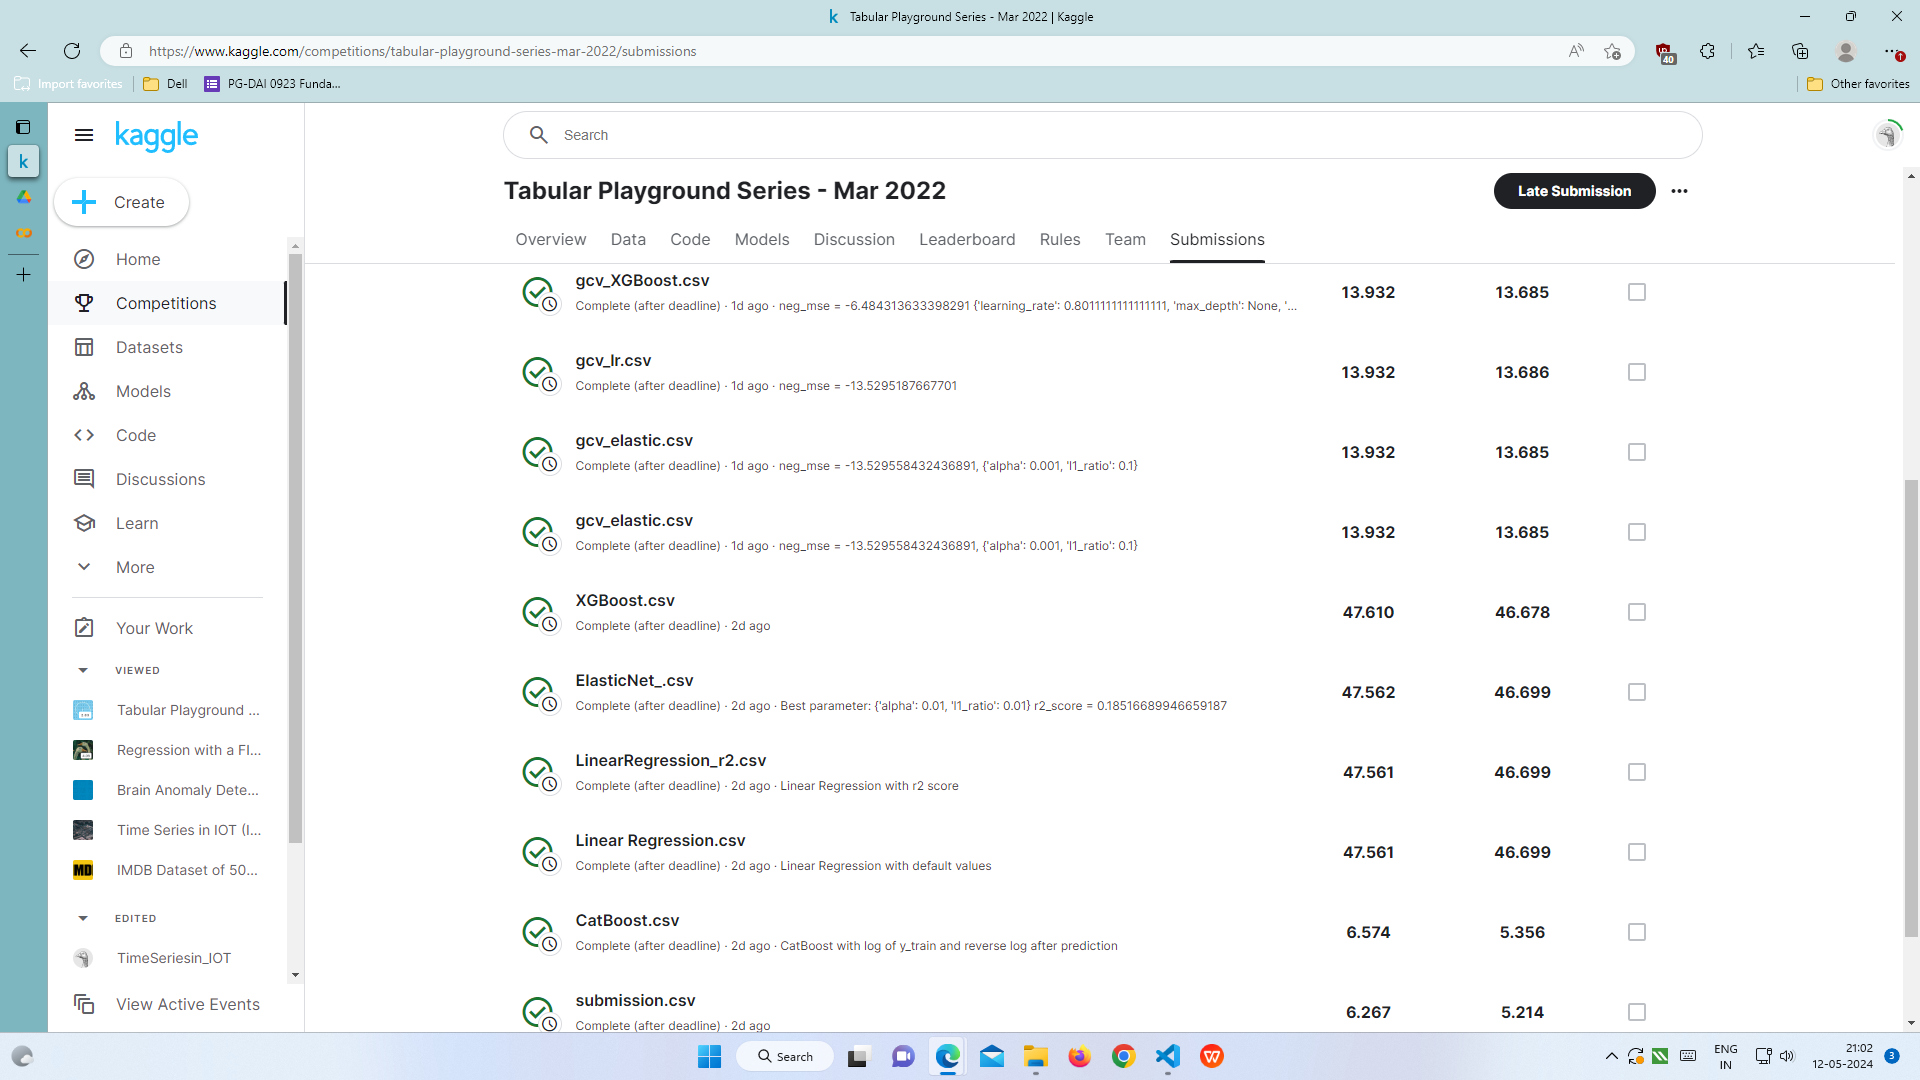

In [1]:
from IPython.display import Image
Image("8005_AYUSH_PML_04.png")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [3]:
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions list

ref                                                                                deadline             category             reward  teamCount  userHasEntered  
---------------------------------------------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
https://www.kaggle.com/competitions/ai-mathematical-olympiad-prize                 2024-06-27 23:59:00  Featured         $1,048,576        543           False  
https://www.kaggle.com/competitions/home-credit-credit-risk-model-stability        2024-05-27 23:59:00  Featured           $105,000       3347           False  
https://www.kaggle.com/competitions/lmsys-chatbot-arena                            2024-08-05 23:59:00  Research           $100,000        226           False  
https://www.kaggle.com/competitions/learning-agency-lab-automated-essay-scoring-2  2024-07-02 23:59:00  Featured            $50,000       1307           False  
https://www.kaggle.com/competition

In [ ]:
!kaggle competitions download -c tabular-playground-series-mar-2022

100% 4.71M/4.71M [00:00<00:00, 33.5MB/s]
100% 4.71M/4.71M [00:00<00:00, 33.3MB/s]


In [ ]:
!unzip "/content/tabular-playground-series-mar-2022.zip" -d "/content/drive/MyDrive/Kaggle_competitions/Tabular_Sereies_mar_2022/"

unzip:  cannot find or open /content/tabular-playground-series-mar-2022.zip, /content/tabular-playground-series-mar-2022.zip.zip or /content/tabular-playground-series-mar-2022.zip.ZIP.


In [4]:
ftrain  = pd.read_csv(r'/content/drive/MyDrive/Kaggle_competitions/Tabular_Sereies_mar_2022/train.csv', index_col=0)
ftest  = pd.read_csv(r'/content/drive/MyDrive/Kaggle_competitions/Tabular_Sereies_mar_2022/test.csv', index_col=0)

In [ ]:
# Visualizing train dataset
print(ftrain.head())

                       time  x  y direction  congestion
row_id                                                 
0       1991-04-01 00:00:00  0  0        EB          70
1       1991-04-01 00:00:00  0  0        NB          49
2       1991-04-01 00:00:00  0  0        SB          24
3       1991-04-01 00:00:00  0  1        EB          18
4       1991-04-01 00:00:00  0  1        NB          60


In [ ]:
# Visualizing test dataset
print(ftest.head())

                       time  x  y direction
row_id                                     
848835  1991-09-30 12:00:00  0  0        EB
848836  1991-09-30 12:00:00  0  0        NB
848837  1991-09-30 12:00:00  0  0        SB
848838  1991-09-30 12:00:00  0  1        EB
848839  1991-09-30 12:00:00  0  1        NB


In [5]:
#
def date_features(df):
  df['time'] = pd.to_datetime(df['time'])
  df['year'] = df['time'].dt.year
  df['month'] = df['time'].dt.month
  df['day'] = df['time'].dt.day
  df['hour'] = df['time'].dt.hour
  df['weekday'] = df['time'].dt.weekday
  df['weekend']  =  df['weekday'].map(lambda x: 1 if ((x==5)|(x==6)) else 0)
  return df

ftrain = date_features(ftrain).drop('time',axis=1)
X_test = date_features(ftest).drop('time',axis=1)

In [6]:
y_train = ftrain['congestion']
le = LabelEncoder()
le.fit(ftrain['direction'])
ftrain['direction'] = le.transform(ftrain['direction'])
X_train = ftrain.drop('congestion',axis=1)
X_test['direction'] = le.transform(ftest['direction'])

print(X_train.head())
print(X_test.head())
print(y_train.head())


        x  y  direction  year  month  day  hour  weekday  weekend
row_id                                                           
0       0  0          0  1991      4    1     0        0        0
1       0  0          1  1991      4    1     0        0        0
2       0  0          4  1991      4    1     0        0        0
3       0  1          0  1991      4    1     0        0        0
4       0  1          1  1991      4    1     0        0        0
        x  y  direction  year  month  day  hour  weekday  weekend
row_id                                                           
848835  0  0          0  1991      9   30    12        0        0
848836  0  0          1  1991      9   30    12        0        0
848837  0  0          4  1991      9   30    12        0        0
848838  0  1          0  1991      9   30    12        0        0
848839  0  1          1  1991      9   30    12        0        0
row_id
0    70
1    49
2    24
3    18
4    60
Name: congestion, dtype: int6

## Visualization

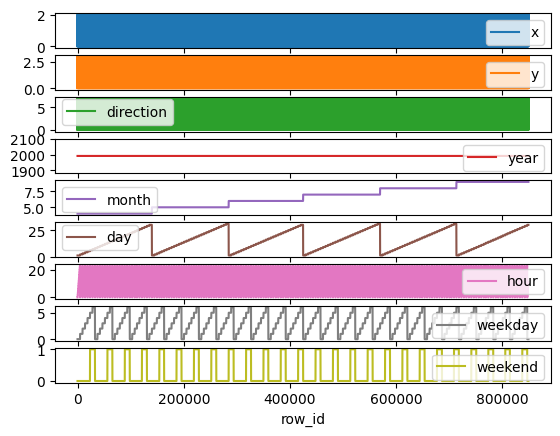

In [ ]:
import seaborn as sns
X_train.plot(subplots=True)
plt.show()

In [ ]:
######  Calculating PCA's and standard scaling with Training Algorithms ##########

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scalar = StandardScaler().set_output(transform="pandas")
scalar.fit(X_train)
# Standard scalaing
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

pca = PCA().set_output(transform='pandas')
principalComponents = pca.fit_transform(X_train_scaled)


## 1

### Linear Regression using  GridSearch with cross validation


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  KFold, GridSearchCV
lr = LinearRegression()
kfold = KFold(n_splits=5,shuffle=True,random_state=24)
gcv_lr = GridSearchCV(lr, cv = kfold, param_grid={}, scoring="neg_mean_absolute_error", verbose=4)
gcv_lr.fit(X_train,y_train)
print(gcv_lr.best_score_)
print(gcv_lr.best_params_)
y_pred = gcv_lr.predict(X_test)
df = pd.DataFrame({'row_id':ftest.index,'congestion':y_pred})
df.to_csv(r'/content/drive/MyDrive/Kaggle_competitions/Tabular_Sereies_mar_2022/gcv_lr.csv', index=False)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ................................., score=-13.532 total time=   0.3s
[CV 2/5] END ................................., score=-13.510 total time=   0.3s
[CV 3/5] END ................................., score=-13.540 total time=   0.4s
[CV 4/5] END ................................., score=-13.531 total time=   0.4s
[CV 5/5] END ................................., score=-13.535 total time=   0.3s
-13.5295187667701
{}


In [ ]:
!kaggle competitions submit -c "tabular-playground-series-mar-2022" -f "/content/drive/MyDrive/Kaggle_competitions/Tabular_Sereies_mar_2022/gcv_lr.csv" -m "neg_mse = -13.5295187667701"

100% 57.7k/57.7k [00:00<00:00, 80.2kB/s]
Successfully submitted to Tabular Playground Series - Mar 2022

## 2

### ElasticNet Regression using  GridSearch with cross validation
#### param = {"alpha": np.linspace(0.001,5,10),"l1_ratio":np.linspace(0.1,0.9,9)}


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import  KFold, GridSearchCV
elastic = ElasticNet(random_state=24)
kfold = KFold(n_splits=5,shuffle=True,random_state=24)
param = {"alpha": np.linspace(0.001,5,10),"l1_ratio":np.linspace(0.1,0.9,9)}
gcv_elastic = GridSearchCV(elastic,cv = kfold, param_grid=param,scoring="neg_mean_absolute_error", verbose=3)
gcv_elastic.fit(X_train,y_train)
print(gcv_elastic.best_score_)
print(gcv_elastic.best_params_)


Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END .......alpha=0.001, l1_ratio=0.1;, score=-13.532 total time=   0.6s
[CV 2/5] END .......alpha=0.001, l1_ratio=0.1;, score=-13.510 total time=   0.7s
[CV 3/5] END .......alpha=0.001, l1_ratio=0.1;, score=-13.540 total time=   0.7s
[CV 4/5] END .......alpha=0.001, l1_ratio=0.1;, score=-13.531 total time=   0.7s
[CV 5/5] END .......alpha=0.001, l1_ratio=0.1;, score=-13.535 total time=   0.7s
[CV 1/5] END .......alpha=0.001, l1_ratio=0.2;, score=-13.532 total time=   0.6s
[CV 2/5] END .......alpha=0.001, l1_ratio=0.2;, score=-13.510 total time=   0.7s
[CV 3/5] END .......alpha=0.001, l1_ratio=0.2;, score=-13.540 total time=   0.8s
[CV 4/5] END .......alpha=0.001, l1_ratio=0.2;, score=-13.531 total time=   0.8s
[CV 5/5] END .......alpha=0.001, l1_ratio=0.2;, score=-13.535 total time=   1.1s
[CV 1/5] END alpha=0.001, l1_ratio=0.30000000000000004;, score=-13.532 total time=   0.9s
[CV 2/5] END alpha=0.001, l1_ratio=0.3

In [ ]:
y_pred = gcv_elastic.predict(X_test)
df = pd.DataFrame({'row_id':ftest.index,'congestion':y_pred})
df.to_csv(r'/content/drive/MyDrive/Kaggle_competitions/Tabular_Sereies_mar_2022/gcv_elastic.csv', index=False)

In [ ]:
!kaggle competitions submit -c "tabular-playground-series-mar-2022" -f "/content/drive/MyDrive/Kaggle_competitions/Tabular_Sereies_mar_2022/gcv_elastic.csv" -m "neg_mse = -13.529558432436891, {'alpha': 0.001, 'l1_ratio': 0.1}"

100% 57.6k/57.6k [00:00<00:00, 85.2kB/s]
Successfully submitted to Tabular Playground Series - Mar 2022

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.3 MB/s eta 0:00:00


### 3. XGBoost Regressor

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import  KFold, GridSearchCV
from lightgbm import LGBMClassifier, LGBMRegressor
from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostRegressor, CatBoostClassifier
xgbr = XGBRegressor(random_state=24)
kfold = KFold(n_splits=5,shuffle=True,random_state=24)
params = {"max_depth":[None, 2, 3, 4],
              "n_estimators": [25, 50, 100],
              "learning_rate": np.linspace(0.01, 0.9, 10)}
gcv_XGb = GridSearchCV(xgbr, cv = kfold, param_grid=params,scoring="neg_mean_absolute_error", verbose=3)
gcv_XGb.fit(X_train,y_train)
print(gcv_XGb.best_score_)
print(gcv_XGb.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END learning_rate=0.01, max_depth=None, n_estimators=25;, score=-12.568 total time=   1.6s
[CV 2/5] END learning_rate=0.01, max_depth=None, n_estimators=25;, score=-12.559 total time=   1.6s
[CV 3/5] END learning_rate=0.01, max_depth=None, n_estimators=25;, score=-12.579 total time=   4.7s
[CV 4/5] END learning_rate=0.01, max_depth=None, n_estimators=25;, score=-12.563 total time=   1.6s
[CV 5/5] END learning_rate=0.01, max_depth=None, n_estimators=25;, score=-12.568 total time=   1.5s
[CV 1/5] END learning_rate=0.01, max_depth=None, n_estimators=50;, score=-11.619 total time=   2.7s
[CV 2/5] END learning_rate=0.01, max_depth=None, n_estimators=50;, score=-11.623 total time=   2.6s
[CV 3/5] END learning_rate=0.01, max_depth=None, n_estimators=50;, score=-11.651 total time=   5.8s
[CV 4/5] END learning_rate=0.01, max_depth=None, n_estimators=50;, score=-11.629 total time=   2.8s
[CV 5/5] END learning_rate=0.01, max_

In [ ]:
y_pred = gcv_elastic.predict(X_test)
df = pd.DataFrame({'row_id':ftest.index,'congestion':y_pred})
df.to_csv(r'/content/drive/MyDrive/Kaggle_competitions/Tabular_Sereies_mar_2022/gcv_XGBoost.csv', index=False)
!kaggle competitions submit -c "tabular-playground-series-mar-2022" -f "/content/drive/MyDrive/Kaggle_competitions/Tabular_Sereies_mar_2022/gcv_XGBoost.csv" -m "neg_mse = -6.484313633398291 {'learning_rate': 0.8011111111111111, 'max_depth': None, 'n_estimators': 100}"

100% 57.6k/57.6k [00:00<00:00, 79.7kB/s]
Successfully submitted to Tabular Playground Series - Mar 2022

In [ ]:
!kaggle competitions submissions -c "tabular-playground-series-mar-2022"

fileName                 date                 description                                                                                                 status    publicScore  privateScore  
-----------------------  -------------------  ----------------------------------------------------------------------------------------------------------  --------  -----------  ------------  
gcv_XGBoost.csv          2024-05-11 17:17:52  neg_mse = -6.484313633398291 {'learning_rate': 0.8011111111111111, 'max_depth': None, 'n_estimators': 100}  complete  13.685       13.932        
gcv_lr.csv               2024-05-11 16:25:10  neg_mse = -13.5295187667701                                                                                 complete  13.686       13.932        
gcv_elastic.csv          2024-05-11 16:13:19  neg_mse = -13.529558432436891, {'alpha': 0.001, 'l1_ratio': 0.1}                                            complete  13.685       13.932        
gcv_elastic.csv          2024-05-11 16:1

## 4

### LGBM Regression using  GridSearch with cross validation
#### param = {"alpha": np.linspace(0.001,5,10),"l1_ratio":np.linspace(0.1,0.9,9)}


In [7]:
from sklearn.model_selection import  KFold, GridSearchCV
from lightgbm import LGBMClassifier, LGBMRegressor

param_grid = {"max_depth":[None, 2, 3, 4],
              "n_estimators": [25, 50, 100],
              "learning_rate": np.linspace(0.01, 0.9, 10)}

lgbr = LGBMRegressor(random_state=24)
kfold = KFold(n_splits=5,shuffle=True,random_state=24)
param = {"alpha": np.linspace(0.001,5,10),"l1_ratio":np.linspace(0.1,0.9,9)}
gcv_elastic = GridSearchCV(lgbr,cv = kfold, param_grid=param,scoring="neg_mean_absolute_error", verbose=10)
gcv_elastic.fit(X_train,y_train)
print(gcv_elastic.best_score_)
print(gcv_elastic.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5; 1/90] START alpha=0.001, l1_ratio=0.1..................................
[LightGBM] [Warning] Unknown parameter: l1_ratio
[LightGBM] [Warning] Unknown parameter: l1_ratio
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 679068, number of used features: 8
[LightGBM] [Info] Start training from score 47.802339
[LightGBM] [Warning] Unknown parameter: l1_ratio
[CV 1/5; 1/90] END ..alpha=0.001, l1_ratio=0.1;, score=-6.989 total time=   4.2s
[CV 2/5; 1/90] START alpha=0.001, l1_ratio=0.1..................................
[LightGBM] [Warning] Unknown parameter: l1_ratio
[LightGBM] [Warning] Unknown parameter: l1_ratio
[LightGBM] [Info] Auto-choosing row-wise mult

In [8]:
y_pred = gcv_elastic.predict(X_test)
df = pd.DataFrame({'row_id':ftest.index,'congestion':y_pred})
df.to_csv(r'/content/drive/MyDrive/Kaggle_competitions/Tabular_Sereies_mar_2022/gcv_lgbm.csv', index=False)


[LightGBM] [Warning] Unknown parameter: l1_ratio
/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `kaggle competitions submit -c "tabular-playground-series-mar-2022" -f "/content/drive/MyDrive/Kaggle_competitions/Tabular_Sereies_mar_2022/gcv_lgbm.csv" -m str(gcv_elastic.best_params_)'


In [10]:
!kaggle competitions submit -c "tabular-playground-series-mar-2022" -f "/content/drive/MyDrive/Kaggle_competitions/Tabular_Sereies_mar_2022/gcv_lgbm.csv" -m "-7.023145227395062 {'alpha': 0.001, 'l1_ratio': 0.1}"

100% 57.5k/57.5k [00:00<00:00, 64.4kB/s]
Successfully submitted to Tabular Playground Series - Mar 2022

In [11]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.3 MB/s eta 0:00:00


### 5 . Catboost Regressor

In [ ]:
from catboost import CatBoostRegressor, CatBoostClassifier
params = {"max_depth":[None, 2, 3, 4],
              "n_estimators": [25, 50, 100],
              "learning_rate": np.linspace(0.01, 0.9, 10)}

cbgr = CatBoostRegressor(random_state=24, logging_level='Silent')
kfold = KFold(n_splits=5,shuffle=True,random_state=24)
#param = {"alpha": np.linspace(0.001,5,10),"l1_ratio":np.linspace(0.1,0.9,9)}
gcv_elastic = GridSearchCV(cbgr,cv = kfold, param_grid=params,scoring="neg_mean_absolute_error", verbose=10)
gcv_elastic.fit(X_train,y_train)
print(gcv_elastic.best_score_)
print(gcv_elastic.best_params_)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5; 1/120] START learning_rate=0.01, max_depth=None, n_estimators=25.......
[CV 1/5; 1/120] END learning_rate=0.01, max_depth=None, n_estimators=25;, score=-12.976 total time=   2.5s
[CV 2/5; 1/120] START learning_rate=0.01, max_depth=None, n_estimators=25.......
[CV 2/5; 1/120] END learning_rate=0.01, max_depth=None, n_estimators=25;, score=-12.958 total time=   2.2s
[CV 3/5; 1/120] START learning_rate=0.01, max_depth=None, n_estimators=25.......
[CV 3/5; 1/120] END learning_rate=0.01, max_depth=None, n_estimators=25;, score=-12.974 total time=   2.2s
[CV 4/5; 1/120] START learning_rate=0.01, max_depth=None, n_estimators=25.......
[CV 4/5; 1/120] END learning_rate=0.01, max_depth=None, n_estimators=25;, score=-12.969 total time=   2.3s
[CV 5/5; 1/120] START learning_rate=0.01, max_depth=None, n_estimators=25.......
[CV 5/5; 1/120] END learning_rate=0.01, max_depth=None, n_estimators=25;, score=-12.965 total time=   4.

In [ ]:
y_pred = gcv_elastic.predict(X_test)
df = pd.DataFrame({'row_id':ftest.index,'congestion':y_pred})
df.to_csv(r'/content/drive/MyDrive/Kaggle_competitions/Tabular_Sereies_mar_2022/gcv_cat.csv', index=False)


In [ ]:
str1 = gcv_elastic.best_params_.to_
!kaggle competitions submit -c "tabular-playground-series-mar-2022" -f "/content/drive/MyDrive/Kaggle_competitions/Tabular_Sereies_mar_2022/gcv_cat.csv" -m "CAtboost"